In [38]:
# STEP 1: Import required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import zipfile # Import the zipfile module

# STEP 2: Define image size and path
IMG_SIZE = (28, 28)
BATCH_SIZE = 32
ZIP_FILE_PATH = "/content/archive (4).zip"  # Path to the zip file
EXTRACT_PATH = "/content/extracted_dataset" # Directory to extract the dataset to

# Extract the zip file
with zipfile.ZipFile(ZIP_FILE_PATH, 'r') as zip_ref:
    zip_ref.extractall(EXTRACT_PATH)

# Now DATASET_PATH should point to the extracted directory
DATASET_PATH = EXTRACT_PATH

# STEP 3: Prepare data using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Use the extracted directory path
train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=True
)

# STEP 4: Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# STEP 5: Train the model
model.fit(train_data, epochs=10, validation_data=val_data)

# STEP 6: Save model (optional)
model.save("even_odd_digit_classifier.h5")

Found 374 images belonging to 1 classes.
Found 93 images belonging to 1 classes.
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 269ms/step - accuracy: 0.7529 - loss: 0.3548 - val_accuracy: 1.0000 - val_loss: 2.1667e-05
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - accuracy: 1.0000 - loss: 6.1919e-06 - val_accuracy: 1.0000 - val_loss: 3.2847e-08
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 292ms/step - accuracy: 1.0000 - loss: 3.2556e-09 - val_accuracy: 1.0000 - val_loss: 3.2040e-09
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - accuracy: 1.0000 - loss: 1.2842e-09 - val_accuracy: 1.0000 - val_loss: 1.4450e-09
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 1.0000 - loss: 1.4272e-10 - val_accuracy: 1.0000 - val_loss: 1.1158e-09
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 1.0000 - loss: 3.2166e-10 - val_accuracy: 1.0000 - val_loss: 1.0286e-09
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 1.0000 - loss: 4.0122e-10 - val_accuracy: 1

In [26]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 364,037 (1.39 MB)

 Trainable params: 121,345 (474.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,692 (948.02 KB)

In [28]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model = load_model('even_odd_digit_classifier.h5')
print("Model Loaded")

Model Loaded


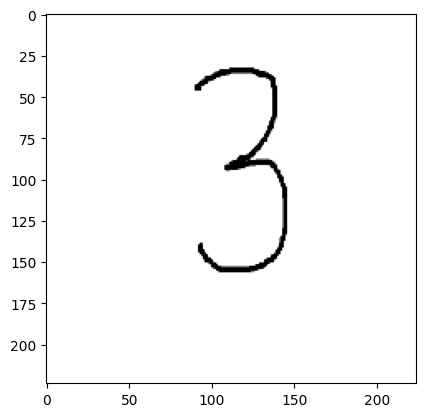

In [27]:
test_image_path="/content/extracted_dataset/captured_images/3/1.png"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [29]:
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np

def predict_image(path):
    # Open and convert to grayscale
    img = Image.open(path).convert("L")     # Convert to grayscale
    img = img.resize((28, 28))              # Resize to match model input

    img_array = np.array(img) / 255.0       # Normalize to [0,1]
    img_array = img_array.reshape(1, 28, 28, 1)  # Add batch and channel dimension

    prediction = model.predict(img_array)[0][0]
    label = "Odd" if prediction > 0.5 else "Even"
    print(f"🔍 Prediction: {label} (Confidence: {prediction:.2f})")

In [30]:
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np

def predict_image(path):
    # Open and convert to grayscale
    img = Image.open(path).convert("L")     # Convert to grayscale
    img = img.resize((28, 28))              # Resize to match model input

    img_array = np.array(img) / 255.0       # Normalize to [0,1]
    img_array = img_array.reshape(1, 28, 28, 1)  # Add batch and channel dimension

    prediction = model.predict(img_array)[0][0]
    label = "Odd" if prediction > 0.5 else "Even"
    print(f"🔍 Prediction: {label} (Confidence: {prediction:.2f})")
    # The function already prints the prediction, so no need for a separate if block after calling it.
    # However, if you need the prediction value outside the function, you could return it:
    # return prediction

# Call the function with the test image path to get and print the prediction
test_image_path="/content/extracted_dataset/captured_images/1/1.png"
predict_image(test_image_path)

# Removed the following code block as it was causing the NameError
# if Prediction >= 0.5:
#     print("🔢 Prediction: Odd Digit")
# else:
#     print("🔢 Prediction: Even Digit")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
🔍 Prediction: Even (Confidence: 0.00)
